# Spline interpolacion
  

In [2]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
import sympy as sp
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$.

In [ ]:
x0, x1, x2 = -1, 0, 1
_x = np.array([x0, x1, x2])
y0, y1, y2 =  5, 3, 3
_y = np.array([y0, y1, y2])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(-1)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(-1)$, es decir, $2c_0+6d_0 = 2c_1$.

  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_1''(1) = 0$, o sea $2c_1+6d_1=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, y $c_1$. Le damos valores a las variables en python:

In [ ]:
a0 = 5
a1 = 3
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$):

 * $b_0+d_0=3-a_0-c_0=-2$,
 * $b_1+c_1+d_1=3-a_1=0$,
 * $b_0+3d_0 - b_1 = -2c_0 = 0$,
 * $6d_0 - 2c_1 = -2c_0=0$
 * $2c_1+6d_1=0$


La matriz y el segundo miembro asociados son:

In [ ]:
A = np.array([
	[ 1, 1,   0,  0, 0],  # cada una es una columna
	[ 0, 0,   1,  1, 1],
	[ 1, 3,  -1,  0, 0],
	[ 0, 6,   0, -2, 0],
	[ 0, 0,   0,  2, 6]])
b = np.array([-2, 0, 0, 0, 0])  # matriz escrita como array

In [ ]:
sol = solve(A,b)
print(sol)

[-2.5  0.5 -1.   1.5 -0.5]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [ ]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))  # decimales para la función, y valores encontrados anteriormente
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))

a0, b0, c0, d0 = 5.000000, -2.500000, 0.000000, 0.500000
a1, b1, c1, d1 = 3.000000, -1.000000, 1.500000, -0.500000


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ y representarlos gráficamente.

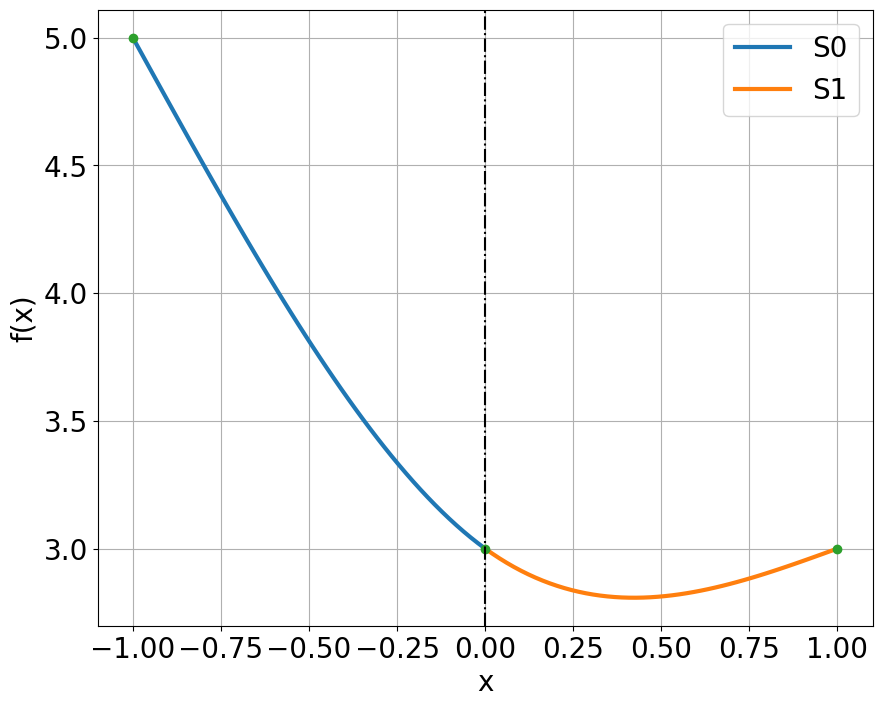

In [ ]:

# definir los polinomios iniciales

def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

xx0 = np.linspace (-1,0)
xx1 = np.linspace (0,1)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()

# **Ejercicio**

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$  $[0,1]$ y $[1,3]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Puntos iniciales: $(-1,5)$, $(0,3)$, $(1,3)$

Realizar con un nuevo punto: $(3,4)$
Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3 $,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3 $,
  * $s_2(x) = a_2 + b_2 (x-x_2) + c_2 (x-x_2)^2 + d_2 (x-x_2)^3 $

Reemplazando:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3 $,
  * $s_1(x) = a_1 + b_1 (x) + c_1 (x)^2 + d_1 (x)^3 $,
  * $s_2(x) = a_2 + b_2 (x-1) + c_2 (x-1)^2 + d_2 (x-1)^3 $

Entonces

  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$
  * $s_0'''(x) = 6 d_0$

  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$
  * $s_1''(x) = 2 c_1 + 6 d_1 x$
  * $s_1'''(x) = 6 d_1$


  * $s_2'(x) =  b_2 + 2 c_2 (x-1) + 3 d_2 (x-1)^2$
  * $s_2''(x) =  2c_2 + 6 d_2 (x-1)$
  * $s_2'''(x) =   6 d_2 $

Tenemos 12 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1,2$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    * $s_2(1)  = 3$, es decir, $a_2=3$.
    * $s_2(3)  = 4$, es decir, $a_2+3b_2+9c_2+27d_2=4$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(-1)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(-1)$, es decir, $2c_0+6d_0 = 2c_1$.
    * $s_1'(1) = s_2'(0)$, es decir, $b_1+2c_1+3d_1=b_2$.
    * $s_1''(1) = s_2'(0)$, es decir, $2c_1+6d_1=2c_2$

  * Condiciones naturales en los extremos, $-1$ y $3$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_2''(3) = 0$, o sea $2c_2+12d_2=0$.



De estas ecuaciones tenemos directamente $a_0$, $a_1$,$a_2$ y $c_0$. Le damos valores a las variables en python:

In [21]:
a0 = 5
a1 = 3
a2= 3
c0 = 0
c1= 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con ocho incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$, $b_2$, $c_2$, $d_2$):

 * $b_0+d_0=-2$,
 * $b_1+d_1=0$,
 * $b_0+3d_0 - b_1 = 0$,
 * $3b_2+9c_2+27d_2= 1$
 * $b_1+3d_1-b_2=0$
 * $6d_0=0$
 * $2c_2+12d_2=0$
 * $6d_1-2c_2=0$


La matriz y el segundo miembro asociados son:

In [38]:
A = np.array([
	[ 1, 1,   0,  0, 0, 0, 0, 0],  # cada una es una columna
	[ 0, 0,   1,  0, 1, 0, 0, 0],
	[ 1, 3,  -1,  0, 0, 0, 0, 0],
	[ 0, 0,   0,  0, 0, 3, 9, 27],
	[ 0, 0,   1,  3, -1, 0, 0, 0],
  [ 0, 6,   0,  0, 0, 0, 0, 0],
	[ 0, 0,   0,  0, 6, 0, -2, 0],
	[ 0, 0,   0,  0, 0, 0, 2, 12]])
b = np.array([-2, 0, 0, 1, 0, 0, 0, 0])  # matriz escrita como array

In [39]:
sol = solve(A,b)
print(sol)

[-2.          0.         -2.          1.33333333  2.         -8.66666667
  6.         -1.        ]


In [40]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1, d1, b2, c2 y d2

b0, d0, b1, c1, d1, b2, c2, d2 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))  # decimales para la función, y valores encontrados anteriormente
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))
print ("a2, b2, c2, d2 = %f, %f, %f, %f" % (a2, b2, c2, d2))

a0, b0, c0, d0 = 5.000000, -2.000000, 0.000000, 0.000000
a1, b1, c1, d1 = 3.000000, -2.000000, 1.333333, 2.000000
a2, b2, c2, d2 = 3.000000, -8.666667, 6.000000, -1.000000


# **Gráfica**

In [41]:
x0, x1, x2, x3 = -1, 0, 1, 3
_x = np.array([x0, x1, x2, x3])
y0, y1, y2, y3 =  5, 3, 3, 4
_y = np.array([y0, y1, y2, y3])

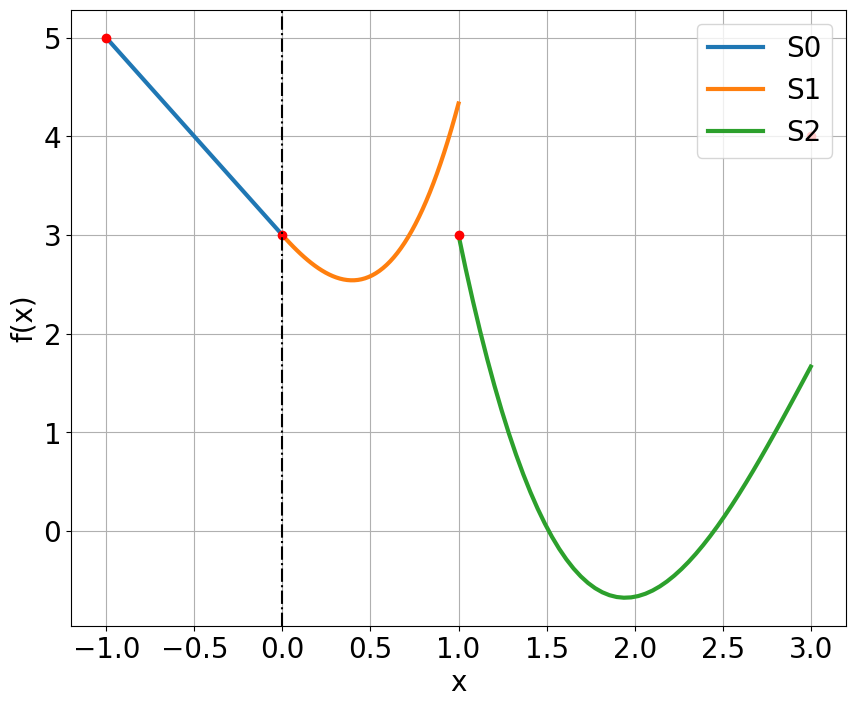

In [37]:

# Definir los polinomios iniciales

def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

def s2(x):
    return a2 + b2*(x-1) + c2*(x-1)**2 + d2*(x-1)**3

xx0 = np.linspace (-1,0)
xx1 = np.linspace (0,1)
xx2 = np.linspace (1,3)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(xx2, s2(xx2), lw=3, label = "S2")
plt.plot(_x, _y, 'ro')

plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()